<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/M3_lab56_topic_modeling_rev5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSA (Latent Semantic Analysis)
- LDA (토픽 모델링) 에 아이디어 제공한 알고리즘
- DTM(document-term matrix) 나 TfIdf matrix 에 Truncated SVD 이용

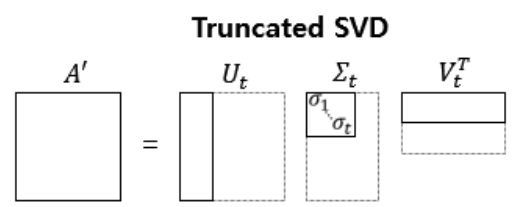

- example from https://wikidocs.net/24949

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

doc1 = "사과 먹고 싶다"
doc2 = "바나나 먹고 싶다"
doc3 = "길고 노란 바나나 바나나"
doc4 = "저는 과일이 좋아요"
corpus = np.array([doc1, doc2, doc3, doc4])
vec = CountVectorizer()
A = vec.fit_transform(corpus).toarray()
A

array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [ ]:
vec.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶다', '저는', '좋아요']

In [ ]:
A.shape

(4, 9)

In [ ]:
U, s, VT = np.linalg.svd(A, full_matrices = True)
print('matrix U :')
print(U.round(2))

matrix U :
[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]


In [ ]:
print('singular vectors :')
print(s.round(2))

singular vectors :
[2.69 2.05 1.73 0.77]


In [ ]:
S = np.zeros((4,9))
S[:4, :4] = np.diag(s)
print(S.round(2))

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


In [ ]:
print('matrix VT :')
print(VT.round(2))

matrix VT :
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


In [ ]:
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))

True

In [ ]:
# let's take the top 2 signular values.
S = S[:2, :2]; S.round(2)

array([[2.69, 0.  ],
       [0.  , 2.05]])

In [ ]:
U = U[:, :2]; U.round(2)   # (4,2) -> 문서의 수 x 토픽의 수
                           # U의 각 행은 잠재 의미를 표현하기 위한 수치화 된 각각의 문서 벡터

array([[-0.24,  0.75],
       [-0.51,  0.44],
       [-0.83, -0.49],
       [-0.  , -0.  ]])

In [ ]:
VT = VT[:2, :]; VT.round(2)   # (2,9) -> 토픽의 수 x 단어의 갯수
                              # VT 의 각 열은 잠재 의미를 표현하기 위해 수치화된 각각의 단어 벡터

array([[-0.  , -0.31, -0.31, -0.28, -0.8 , -0.09, -0.28, -0.  , -0.  ],
       [ 0.  , -0.24, -0.24,  0.58, -0.26,  0.37,  0.58, -0.  , -0.  ]])

In [ ]:
A_prime = U @ S @ VT; A_prime.round(2)

array([[ 0.  , -0.17, -0.17,  1.08,  0.12,  0.62,  1.08, -0.  , -0.  ],
       [ 0.  ,  0.2 ,  0.2 ,  0.91,  0.86,  0.45,  0.91,  0.  ,  0.  ],
       [ 0.  ,  0.93,  0.93,  0.03,  2.05, -0.17,  0.03,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ]])

- example
  - Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터 (sklearn)
  - 문서의 수를 원하는 토픽의 수로 압축한 뒤에 각 토픽당 가장 중요한 단어 5개를 출력하는 실습으로 토픽 모델링을 수행

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

샘플의 수 : 11314


In [ ]:
documents[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [ ]:
print(dataset.target_names)  #  20개의 뉴스그룹 카테고리

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
# text preprocessing
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-17-f494c22217f3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [ ]:
news_df['clean_doc'][0]

'well sure about story seem biased what disagree with your statement that media ruin israels reputation that rediculous media most israeli media world having lived europe realize that incidences such described letter have occured media whole seem ignore them subsidizing israels existance europeans least same degree think that might reason they report more clearly atrocities what shame that austria daily reports inhuman acts commited israeli soldiers blessing received from government makes some holocaust guilt away after look jews treating other races when they power unfortunate'

In [ ]:
# NLTK로부터 불용어를 받아와 제거한다.
nltk.download('stopwords')
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # split default - any whitespace
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(tokenized_doc[0])

['well', 'sure', 'story', 'seem', 'biased', 'disagree', 'statement', 'media', 'ruin', 'israels', 'reputation', 'rediculous', 'media', 'israeli', 'media', 'world', 'lived', 'europe', 'realize', 'incidences', 'described', 'letter', 'occured', 'media', 'whole', 'seem', 'ignore', 'subsidizing', 'israels', 'existance', 'europeans', 'least', 'degree', 'think', 'might', 'reason', 'report', 'clearly', 'atrocities', 'shame', 'austria', 'daily', 'reports', 'inhuman', 'acts', 'commited', 'israeli', 'soldiers', 'blessing', 'received', 'government', 'makes', 'holocaust', 'guilt', 'away', 'look', 'jews', 'treating', 'races', 'power', 'unfortunate']


In [ ]:
# tf-idf matrix
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
news_df['clean_doc'][0]

'well sure story seem biased disagree statement media ruin israels reputation rediculous media israeli media world lived europe realize incidences described letter occured media whole seem ignore subsidizing israels existance europeans least degree think might reason report clearly atrocities shame austria daily reports inhuman acts commited israeli soldiers blessing received government makes holocaust guilt away look jews treating races power unfortunate'

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', 
                             max_features= 1000, # 상위 1,000개의 단어
                             max_df = 0.5,       # ignore terms of df higher than 0.5
                             smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

print(X.shape)

(11314, 1000)


In [ ]:
# topic modeling
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)   # VT matrix

20

In [ ]:
np.shape(svd_model.components_)  # 정확하게 토픽의 수 t × 단어의 수의 크기를 가지고 있다.

(20, 1000)

- 각 20개의 행에 대해 각 1,000개의 열 중 가장 값이 큰 5개의 값을 찾아서 단어로 출력.

In [ ]:
# first row 에 대해 먼저 확인
idx_5 = svd_model.components_[0].argsort()[-5:]
idx_5

array([365, 894, 626, 456, 481])

In [ ]:
[vectorizer.get_feature_names()[i] for i in idx_5][::-1]

['like', 'know', 'people', 'think', 'good']

In [ ]:
# 모든 row 에 대해 확인
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        # print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[-n:][::-1]])

get_topics(svd_model.components_, terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

- Pros and Cons of LSA:
  - can be implemented easily and quickly.
  - good performance in calculating the similarity of documents as it can derive the potential meaning of word
  - But, if you add new data, you should recalculate it (difficult to update)
  - that is why word embedding (like Word2Vec) is in the spotlight.

# LDA (Latent Dirichlet Allocation)
- LDA는 문서들은 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정.
- 데이터가 주어지면, LDA는 문서가 생성되던 과정을 역추적
- https://wikidocs.net/30708

- LDA algorithm:
  - (1) hyperparameter k is given
  - (2) assign all words to one of k topics
  - (3) iterate followings:
     - assume the word w is mis-assigned and all others are well- assigned
     - re-assign w based on:
        - p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
        - p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포
- LSA and LDA
  - LSA: DTM을 차원 축소 하여 축소 차원에서 근접 단어들을 토픽으로 묶는다
  - LDA: 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽을 추출

In [ ]:
# let's use the same dataset as we used in LSA
print(tokenized_doc.shape)
tokenized_doc[:5]

(11314,)


0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

- record word frequency (word_id, word_freq)

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[-1])

[(24, 1), (30, 1), (52, 2), (56, 1), (65, 1), (107, 1), (108, 1), (109, 1), (128, 1), (136, 1), (137, 1), (146, 1), (190, 1), (194, 3), (198, 1), (206, 1), (224, 1), (257, 1), (277, 1), (331, 1), (403, 1), (432, 1), (437, 1), (500, 1), (510, 1), (514, 2), (524, 1), (682, 1), (761, 1), (787, 1), (1016, 1), (1350, 1), (1607, 1), (1671, 1), (1769, 1), (2016, 2), (2054, 1), (2081, 1), (2123, 1), (2399, 1), (2461, 1), (2518, 2), (2535, 1), (2610, 1), (2754, 1), (2838, 2), (3084, 1), (3106, 1), (3177, 1), (3178, 1), (3600, 1), (3664, 1), (3770, 1), (3850, 1), (3910, 1), (3925, 1), (4106, 1), (4303, 1), (4554, 1), (4601, 1), (5256, 1), (6057, 2), (6701, 1), (7175, 1), (7894, 1), (8035, 4), (8600, 1), (8672, 1), (9476, 1), (9609, 1), (9881, 1), (10114, 1), (12075, 1), (13336, 1), (14732, 1), (15949, 1), (19000, 1), (29319, 1), (41046, 2), (47866, 1), (64276, 1), (64277, 1), (64278, 1), (64279, 1), (64280, 1)]


In [ ]:
# LDA train
import gensim

NUM_TOPICS = 20      # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)  # 4 개의 단어만 출력
for topic in topics:
    print(topic)

(0, '0.013*"period" + 0.011*"play" + 0.008*"power" + 0.005*"scorer"')
(1, '0.010*"nrhj" + 0.007*"wwiz" + 0.006*"bxom" + 0.006*"gizw"')
(2, '0.012*"wire" + 0.012*"ground" + 0.010*"food" + 0.009*"neutral"')
(3, '0.007*"health" + 0.006*"research" + 0.006*"university" + 0.005*"medical"')
(4, '0.011*"government" + 0.008*"state" + 0.007*"right" + 0.007*"people"')
(5, '0.007*"contest" + 0.004*"much" + 0.004*"also" + 0.004*"stuff"')
(6, '0.011*"armenian" + 0.011*"people" + 0.011*"said" + 0.010*"israel"')
(7, '0.008*"fire" + 0.006*"koresh" + 0.005*"children" + 0.005*"henrik"')
(8, '0.019*"space" + 0.009*"encryption" + 0.008*"chip" + 0.007*"clipper"')
(9, '0.032*"jesus" + 0.013*"church" + 0.013*"christ" + 0.009*"bible"')
(10, '0.006*"wiring" + 0.006*"order" + 0.005*"compass" + 0.003*"aircraft"')
(11, '0.017*"sale" + 0.014*"offer" + 0.014*"price" + 0.012*"shipping"')
(12, '0.013*"thanks" + 0.013*"windows" + 0.013*"would" + 0.011*"know"')
(13, '0.011*"year" + 0.010*"game" + 0.010*"team" + 0.007*"t

In [ ]:
ldamodel.print_topics()  # 10 개 단어 출력

[(0,
  '0.013*"period" + 0.011*"play" + 0.008*"power" + 0.005*"scorer" + 0.005*"philadelphia" + 0.005*"kings" + 0.005*"first" + 0.005*"calgary" + 0.005*"cover" + 0.004*"second"'),
 (1,
  '0.010*"nrhj" + 0.007*"wwiz" + 0.006*"bxom" + 0.006*"gizw" + 0.005*"nist" + 0.005*"tbxn" + 0.005*"bhjn" + 0.005*"bxlt" + 0.004*"wmbxn" + 0.004*"nriz"'),
 (2,
  '0.012*"wire" + 0.012*"ground" + 0.010*"food" + 0.009*"neutral" + 0.006*"pens" + 0.006*"electrical" + 0.005*"circuit" + 0.005*"panel" + 0.004*"station" + 0.004*"outlets"'),
 (3,
  '0.007*"health" + 0.006*"research" + 0.006*"university" + 0.005*"medical" + 0.004*"years" + 0.004*"study" + 0.004*"among" + 0.004*"national" + 0.004*"center" + 0.004*"number"'),
 (4,
  '0.011*"government" + 0.008*"state" + 0.007*"right" + 0.007*"people" + 0.007*"guns" + 0.007*"would" + 0.006*"rights" + 0.006*"police" + 0.006*"public" + 0.006*"control"'),
 (5,
  '0.007*"contest" + 0.004*"much" + 0.004*"also" + 0.004*"stuff" + 0.004*"bytes" + 0.004*"type" + 0.004*"font" 

- visualize LDA

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=cbc21915dddbb51bfc2bd3c548670d9cc70e3ea0ea6dc1710de5fec39f07eaef
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=9eeb71ce788e01d6fd057e2ff3c06c9ac19a3d5e95004bf5e0920d26279ba876
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


- 문서 별 토픽 분포 보기

In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(6, 0.24176957), (7, 0.08450302), (8, 0.20761965), (16, 0.43625924), (18, 0.017751733)]
1 번째 문서의 topic 비율은 [(5, 0.03576921), (6, 0.1935219), (12, 0.13032566), (16, 0.5962956), (18, 0.025794942)]
2 번째 문서의 topic 비율은 [(3, 0.039979015), (6, 0.24828048), (13, 0.22157952), (15, 0.03612403), (16, 0.44194016)]
3 번째 문서의 topic 비율은 [(5, 0.2579215), (6, 0.05555909), (8, 0.2649177), (12, 0.08496508), (15, 0.11747661), (16, 0.20871226)]
4 번째 문서의 topic 비율은 [(7, 0.0400383), (13, 0.5553491), (17, 0.2880737), (19, 0.08690926)]


In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,16.0,0.4363,"[(6, 0.24175741), (7, 0.08450838), (8, 0.20762..."
1,1,16.0,0.5962,"[(5, 0.0357635), (6, 0.19352415), (12, 0.13038..."
2,2,16.0,0.4419,"[(3, 0.039979175), (6, 0.24827954), (13, 0.221..."
3,3,8.0,0.2649,"[(5, 0.2579327), (6, 0.055567637), (8, 0.26491..."
4,4,13.0,0.5553,"[(7, 0.040038053), (13, 0.55533075), (17, 0.28..."
5,5,15.0,0.4511,"[(7, 0.04234852), (9, 0.15699701), (10, 0.0854..."
6,6,15.0,0.9102,"[(0, 0.018699815), (12, 0.054792598), (15, 0.9..."
7,7,16.0,0.5179,"[(6, 0.16109857), (7, 0.035746112), (8, 0.1822..."
8,8,10.0,0.4007,"[(2, 0.122777), (7, 0.036166955), (10, 0.40073..."
9,9,15.0,0.4513,"[(0, 0.018809587), (5, 0.12931643), (7, 0.0554..."


# LDA - 한국어 기사 예제
- 주어진 문서의 주제(카테고리)를 구분 - 비지도 학습
- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)
- LDA(Latent Dirichlet Allocation) 사용하여 관련된 단어나 문서의 집합을 찾는다. 관련성이 높은 단어들이 발생하면 같은 토픽으로 분류.
- 각 문서들의 토픽들이 디리클레 분포를 따른다고 가정.
- 문서마다 토픽이 어떻게 분포되어 있는지, 그리고 토픽마다 단어의 분포가 어떻게 되어 있는지 파악, 토픽에 따라 단어의 분포를 결정하고 그 중 가장 확률이 높은 단어를 선택.
- LDA:
  - 말뭉치로부터 대표적인 토픽 선정
  - 해당 토픽으로부터 단어들을 뽑아 문서를 생성


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import konlpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Okt

In [ ]:
!wget https://bit.ly/2QA9xhg -O news_1500.xlsx

--2023-01-24 05:48:11--  https://bit.ly/2QA9xhg
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/yj1gxuy0hkjwjpu/news_1500.xlsx [following]
--2023-01-24 05:48:11--  https://www.dropbox.com/s/yj1gxuy0hkjwjpu/news_1500.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/yj1gxuy0hkjwjpu/news_1500.xlsx [following]
--2023-01-24 05:48:11--  https://www.dropbox.com/s/raw/yj1gxuy0hkjwjpu/news_1500.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5073f9acc1d3cef6bff64c66ba.dl.dropboxusercontent.com/cd/0/inline/B1JHLQ2XxLOwoHMzrbnXfpr0wQ6BXBG1laDxQkiBe4QfSwaEOf-nOB

In [ ]:
df_train = pd.read_excel('news_1500.xlsx', names=['기사'], 
                         keep_default_na=False) # no strings parsed as NaN values 
#Countvectorizer적용을 위해 list로 변환
list_train = df_train['기사'].tolist()

In [ ]:
df_train.head(3)

,기사
0,호주 브리즈번에서 발생한 한국인 워킹홀리데이 참가자 살해범이 같은 한국인 것으로 드...
1,호주 경찰이 한국인 워킹홀리데이 참가자를 살해한 혐의로 또 다른 한국인 남성을 기소...
2,\n \n호주 괴물 가재가 공개돼 네티즌들의 폭발적인 관심을 끌고 있다. \n ...


In [ ]:
list_train[:5], len(list_train)

(['호주 브리즈번에서 발생한 한국인 워킹홀리데이 참가자 살해범이 같은 한국인 것으로 드라나 충격을 주고 있다. \n \n20일 호주 국영 ABC방송은 퀸즐랜드주 경찰이 김모(28)씨를 살해하고 암매장한 혐의로\xa0한국인 홍모(28)씨를\xa0체포했다고 보도했다. \n \n경찰에 따르면 홍씨는\xa0지난 16일 오후 브리즈번 캐넌힐에서 1만 5000 호주달러를 원화로 환전해줄 사..',
  '호주 경찰이 한국인 워킹홀리데이 참가자를 살해한 혐의로 또 다른 한국인 남성을 기소했다고 호주 언론이 보도했다. \n \n퀸즐랜드주 경찰은 20일(현지시간) 금품을 빼앗기 위해 김민태(28)씨를 살해한 혐의로 황모(28)씨를 기소했다고 시드니모닝헤럴드가 보도했다. \n \n그는 이날 브리즈번 법원에서 열린 심리에 출석해 기자들로부터 고개를 돌린 채 아래쪽만 쳐..',
  '\xa0 \n \n호주 괴물 가재가 공개돼 네티즌들의 폭발적인 관심을 끌고 있다. \n \n최근 각종 온라인 커뮤니티 게시판에는 ‘호주 괴물 가재’라는 제목의 사진 한 장이 게재됐다. \n \n공개된 사진에는 웬만한 성인 남성 팔 크기와 비슷한 가재의 모습이 담겨 있다. 사진 속 남성도 가재가 무거운지 엉거주춤한 자세를 취하고 있다. 호주에서 잡힌 것으로 알려진 가재의..',
  '최근 인기를 끌고 있는 tvN의 드라마 ‘응답하라 1994’가 같은 장면을 내보내고 다른 프로그램의 화면이 나오는 등 방송사고를 냈다. \n▶ 방송사고 이후 사과 자막이 나오는 tvN ‘응답하라 1994’의 한 장면.20일 밤 10시쯤 드라마 ‘응답하라 1994’가 방송되는 도중에 방송사고가 발생했다. 이날 방송에서 성나정이 호주로 떠났다가 한국으로 돌아..',
  '호주 워킹홀리데이 한국인 참가자가 19일 또다시 숨진 채 발견됐다. 지난달 호주에서 한국인 여대생이 무참히 살해된 지 한 달도 지나지 않아 발생한 이번 사건으로 호주 교민사회 및 어학연수 희망자들의 불안감이 커지고 있다. \n \n호주 ABC방송 등에 따르면 퀸

In [ ]:
okt = Okt()
results = []
for line in list_train:
    word_list = okt.pos(line, norm=True, stem=True)  # part of speech (품사)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)

In [ ]:
results[:5]

['호주 브리즈번 발생 한국인 워킹홀리데이 참가자 살해 범 같다 한국인 것 드라 충격 있다 20일 호주 국영 ABC 방송 퀸즐랜드 주 경찰 김모 28 씨 살해 암매장 혐의 \xa0 한국인 홍모 28 씨 \xa0 체포 보도 경찰 홍씨 \xa0 지난 16일 오후 브리즈번 캐넌 힐 1만 5000 호주달러 원화로 환전 사',
 '호주 경찰 한국인 워킹홀리데이 참가자 살해 혐의 또 다른 한국인 남성 기소 호주 언론 보도 퀸즐랜드 주 경찰 20일 현지 시간 금품 위해 김민 태 28 씨 살해 혐의 황모 28 씨 기소 시드니 모닝 헤럴드 보도 그 이 날 브리즈번 법원 심리 출석 기자 들 로부터 고개 채 아래쪽',
 '호주 괴물 가재 공개 네티즌 들 폭발 적 관심 끌 있다 최근 각종 온라인 커뮤니티 게시판 ‘ 호주 괴물 가재 제목 사진 장이 게재 공개 사진 웬만하다 성인 남성 팔 크기 비슷하다 가재 모습 있다 사진 속 남성 가재 무겁다 엉거주춤 자세 취하 있다 호주 것 가재',
 '최근 인기 끌 있다 tvN 의 드라마 ‘ 응답 하 1994 같다 장면 다른 프로그램 화면 등 방송사고 ▶ 방송사고 이후 사과 자막 tvN ‘ 응답 하 1994 의 장면 20일 밤 10시 쯤 드라마 ‘ 응답 하 1994 방송 도중 방송사고 발생 이 날 방송 정이 호주 한국',
 '호주 워킹홀리데이 한국인 참가자 19일 또다시 채 발견 지난달 호주 한국인 여대생 무참 히 살해 달도 발생 이번 사건 호주 교민 사회 및 어학 연수 희망 자 들 불안감 있다 호주 ABC 방송 등 퀸즐랜드 주 경찰 이 날 브리즈번 남 서부 앨 지스 터 주택 뒷마당 발견 변 사체 사흘 전 행방 불']

- LDA

In [ ]:
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# max_df = 25 means "ignore terms that appear in more than 25 documents".

vect = CountVectorizer(max_features=10000, max_df=.10)
X = vect.fit_transform(results)

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [ ]:
X.shape

(1499, 10000)

In [ ]:
document_topics.shape    # no_documents x no_topics

(1499, 10)

In [ ]:
document_topics[0]

array([0.0028581 , 0.00285819, 0.00285742, 0.3137773 , 0.00285793,
       0.66336031, 0.00285772, 0.00285763, 0.00285744, 0.00285798])

- components_[i, j] can be viewed as pseudocount that represents the number of times (word j was assigned to topic i). 
-  It can also be viewed as distribution over the words for each topic after normalization:

In [ ]:
lda.components_.shape     # no_topics x no_vocabularies

(10, 10000)

In [ ]:
lda.components_[0]

array([0.1       , 0.1       , 1.10000029, ..., 0.1       , 0.1       ,
       0.1       ])

In [ ]:
lda.components_.argsort(axis=1)[:,::-1]

array([[4166, 6205, 5187, ..., 6066, 5206, 8109],
       [4339, 9353, 7862, ..., 5982, 5206, 8109],
       [2554, 4573, 4202, ..., 5982, 6066, 8109],
       ...,
       [2499, 2554, 4655, ..., 6066, 5206, 8109],
       [3471, 3823, 2499, ..., 6066, 5206, 8109],
       [5945, 8843, 6884, ..., 5982, 6066, 5206]])

In [ ]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lda.components_.shape

(10, 10000)

In [ ]:
N = 10 # number of words to print for each topic
for i in range(0, lda.components_.shape[0]):
    print ("topic {}:".format(i))
    topic_idx = lda.components_.argsort(axis=1)[:,::-1][i]
    topic_words = [topic_idx[j] for j in range(0,N)]
    print (feature_names[topic_words])

topic 0:
['박태환' '올림픽' '수영' '출전' '리우' '국가대표' '27' '정부' '선수' '대학']
topic 1:
['보도' '필리핀' '지역' '통해' '결과' '정부' '같다' '발견' '조사' '방송']
topic 2:
['국제' '사드' '발표' '개최' '내년' '독도' '평화' '위성' '소녀' '기업']
topic 3:
['리그' '포켓몬' '축구' 'acl' '감독' '게임' '시즌' '해밍턴' '지난해' '전북']
topic 4:
['올림픽' '경기' '대표팀' '예선' '대회' '시드니' '오후' '2016' '출전' '리우']
topic 5:
['축구' '브라질' '월드컵' '선수' 'fifa' '본선' '대표팀' '연맹' '2014' '국제']
topic 6:
['골프' '투어' '프로' '대회' '여자' '랭킹' 'lpga' '상금' '라운드' 'pga']
topic 7:
['국가' '국제' '삼성' '대만' '2013' '해외' '시리즈' '대통령' '정보' '보도']
topic 8:
['대통령' '마약' '국가' '개국' '없다' '20' '개발' '전자' '유엔' '우리나라']
topic 9:
['여성' '통화' '일리' '시드니' '수출' '메일' '해외' '밉다' '정부' '소녀']


In [ ]:
### text 에 있는 포맷 (위와 동일한 정보) ###

%matplotlib inline
import matplotlib.pyplot as plt

def print_topics(topics, feature_names, sorting, topics_per_chunk=6, n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")


In [ ]:
print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, 
             topics_per_chunk=4, n_words=10)

topic 0       topic 1       topic 2       topic 3       
--------      --------      --------      --------      
박태환           보도            국제            리그            
올림픽           필리핀           사드            포켓몬           
수영            지역            발표            축구            
출전            통해            개최            acl           
리우            결과            내년            감독            
국가대표          정부            독도            게임            
27            같다            평화            시즌            
정부            발견            위성            해밍턴           
선수            조사            소녀            지난해           
대학            방송            기업            전북            


topic 4       topic 5       topic 6       topic 7       
--------      --------      --------      --------      
올림픽           축구            골프            국가            
경기            브라질           투어            국제            
대표팀           월드컵           프로            삼성            
예선            선수            대

In [ ]:
# 100개 토픽으로 학습
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [ ]:
topics = np.array([7, 16, 24, 41, 45, 51, 54, 81, 89, 97])

In [ ]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 7       topic 16      topic 24      topic 41      topic 45      
--------      --------      --------      --------      --------      
엘니뇨           위해            사이트           태풍            리그            
피해자           남중국해          경쟁            이름            전북            
옥스팜           보도            이행            의미            축구            
보고서           페이스북          도박            손흥민           연맹            
wff           커플            수준            독일            acl           
노예            인도            포트            지역            챔피언스리그        
2013          합동            발표            매장            클래식           
트러블메이커        순찰            국가            물이            현대            
가장            이케아           대학            게시            서울            
항공            방송            등급            말레이시아         시즌            


topic 51      topic 54      topic 81      topic 89      topic 97      
--------      --------      --------      --------      --------      
브라질 

In [ ]:
document_topics100.shape

(1499, 100)

In [ ]:
np.argsort(document_topics100[:, 77])[::-1]

array([  26,  428,  273, ...,  839, 1193,  805])

In [ ]:
# 관련 토픽 77를 가중치로 정렬
topic77 = np.argsort(document_topics100[:, 77])[::-1]

# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력
for i in topic77[:5]:
    # 첫 두 문장을 출력합니다
    print(list_train[i], "\n")
    print("***")

해외 한국인 유학생 수가 6년 연속 20만 명 이상을 기록하면서 어학연수 해외유학 교환학생 교수 해외 주재원 등 소량화물이사 운송 서비스의 수요가 크게 늘고 있다. 
 
한국교육개발원과 교육부 등에서 집계한 해외 유학생 현황 통계자료(2012년 기준)에 따르면, 국외 한국인 유학생 수는 2007년 처음으로 20만 명 이상을 돌파한 이래 여전히 높은 수치.. 

***
화학무기 참사가 발생한 시리아에 대한 공습이 초읽기에 들어갔다는 관측 속에 미국의 움직임이 긴박하다.미국은 버락 오바마 대통령을 비롯해 척 헤이글 국방장관, 존 케리 국무장관 등 국방 안보 라인이 모두 나서 주요 우방과 전방위로 접촉하며 군사 행동에 착수할  경우에 대비한 공조 체제 가동 등의 약속을 받아내고 있다.오바마 대통령은 27일(현지시간) 케빈.. 

***
윤상직 산업통상자원부 장관은 14일 미국 주도의 다자 FTA(자유무역협정)인 환태평양경제동반자협정(TPP) 참여 문제와 관련, "가입 여부 자체를 확정하지 않았다"고 말했다.윤 장관은 이날 정부과천청사에서 진행된 국회 산업통상자원위의 산업부 국정감사 답변을 통해 이같이 밝혔다고 연합뉴스가 전했다. 윤 장관은 한-중 FTA와의 연관성에 대한 질의에는 "별.. 

***
동북아허브 공항을 표방하고 있는 인천국제공항의 경쟁력이 세계 최하위 수준으로 나타났다. 
 
한국 항공사의 정시운항률 역시 세계 최하위권이라 항공산업 전반의 경쟁력 제고가 시급하다는 지적이다. 
 
11일 글로벌 항공정보 제공업체 OAG(Official Airline Guide)가 최근 공개한 ‘OAG 메가허브 2016’에 따르면 인천공항은 조사대상 세.. 

***
일본과 호주의 국방장관이 25일 양국 안보협력을 강화하기로 했으며 중국의 해양 진출이 인근 지역 긴장을 고조시킨다는데 의견을 함께했다고 일본 언론이 보도했다. 
 
보도에 따르면 이나다 도모미(稻田朋美) 방위상은 이날 일본을 방문 중인 머리스 페인 호주 국방장관과 만나 상호군수지원협정(ACSA) 개정 협의를

In [ ]:
#한글 폰트 설치 (should restart the kernel after installing)

import matplotlib
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
matplotlib.font_manager._rebuild()


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20180306-3).
fonts-nanum-coding is already the newest version (2.5-2).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.13.1-2ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetyp

In [ ]:
import platform
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
import matplotlib

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    # rc('font', family='NanumBarunGothic')
    rc('font', family='NanumBarunGothic')
else:
    print('system error...')

In [ ]:
sorting

array([[8043, 3815, 2365, ..., 6631, 6630,    0],
       [3167,    6, 6807, ..., 6622, 6621,    0],
       [1917, 4202, 9704, ..., 6592, 6591,    0],
       ...,
       [3588, 6308, 7764, ..., 6632, 6631, 4999],
       [ 263, 4613, 1876, ..., 6610, 6609,    0],
       [5210, 7862, 2088, ..., 6623, 6622,    0]])

In [ ]:
feature_names.shape, feature_names[:10]

((10000,), array(['00', '000만', '02', '03', '09', '10', '100', '1000', '1000만',
        '1000만달러'], dtype='<U16'))

In [ ]:
feature_names[sorting[:, :2]].shape   # 각 topic 별 가장 많이 할당된 단어 2개씩

(100, 2)

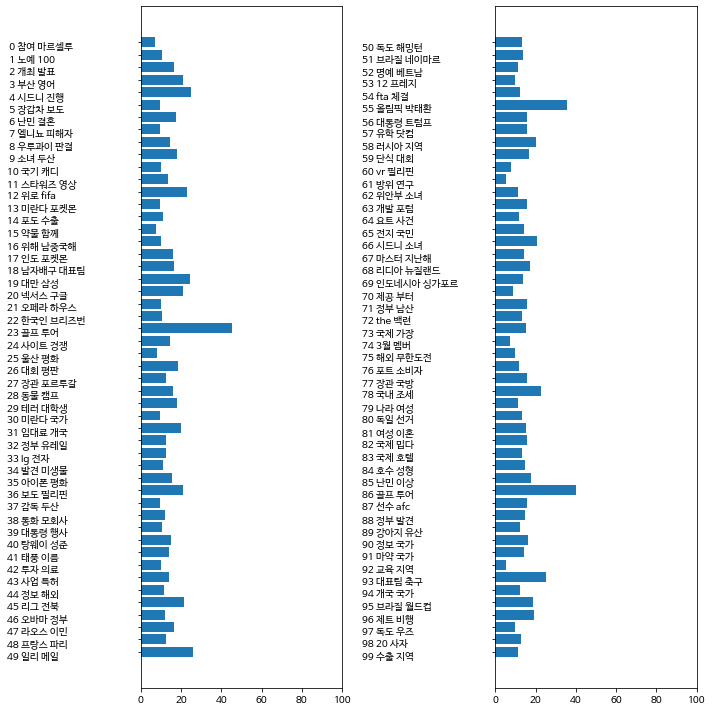

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 100)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

# A simple LDA example

In [ ]:
list_doc = ["나는 학교에 갑니다.",
      "우리는 학교에서 공부를 합니다.",
      "학교에서는 운동도 합니다.",
      "지금은 골프하기에 아주 좋은 날씨입니다.",
      "축구를 학교에서 시청하기도 합니다.",
      "공부를 열시히 해서 좋은 데이터 엔지니어가 될 것입니다.",
      "학교에서는 많은 친구를 사귑니다."]

okt = Okt()
results = []
for line in list_doc:
    word_list = okt.pos(line, norm=True, stem=True)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)


In [ ]:
vect = CountVectorizer(max_features=10)
X = vect.fit_transform(results)

lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [ ]:
X.toarray().shape        # no_documents x no_words

(7, 10)

In [ ]:
 document_topics.shape   # no_documents x no_topics

(7, 5)

In [ ]:
lda.components_.shape    # no_topics x no_words

(5, 10)

In [ ]:
lda.components_.round(2)    # no of topics x number of words

array([[1.2, 0.2, 1.2, 0.2, 0.2, 0.2, 1.2, 1.2, 1.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 1.2, 0.2, 0.2, 0.2, 0.2, 1.2],
       [0.2, 1.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 3.2],
       [0.2, 1.2, 0.2, 1.2, 0.2, 0.2, 0.2, 1.2, 1.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2, 1.2, 0.2, 0.2, 0.2, 1.2]])

In [ ]:
feature_names = np.array(vect.get_feature_names())
N=7
for i in range(0, lda.components_.shape[0]):
    print ("topic {}:".format(i))
    topic_idx = lda.components_.argsort(axis=1)[:,::-1][i]
    print(topic_idx)
    topic_words = [topic_idx[j] for j in range(0,N)]
    print (feature_names[topic_words])

topic 0:
[6 2 0 8 7 9 1 4 5 3]
['아주' '날씨' '골프' '좋다' '이다' '학교' '공부']
topic 1:
[4 9 1 8 7 5 3 6 2 0]
['많다' '학교' '공부' '좋다' '이다' '시청' '데이터']
topic 2:
[9 1 8 7 4 5 3 6 2 0]
['학교' '공부' '좋다' '이다' '많다' '시청' '데이터']
topic 3:
[1 8 7 3 9 4 5 6 2 0]
['공부' '좋다' '이다' '데이터' '학교' '많다' '시청']
topic 4:
[5 9 1 8 7 4 3 6 2 0]
['시청' '학교' '공부' '좋다' '이다' '많다' '데이터']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<BarContainer object of 5 artists>

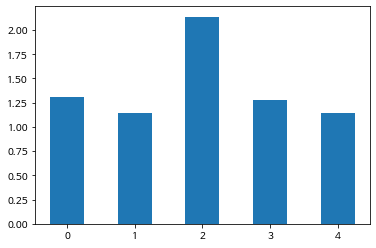

In [ ]:
plt.bar(np.arange(5), np.sum(document_topics, axis=0), width=0.5)

- LDA
  - Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts. 
  - In a practical and more intuitively, you can think of it as a task of:
    - Dimensionality Reduction, where rather than representing a text T in its feature space as {W_i: count(W_i, T) for W_i in Vocabulary}, you can represent it in a topic space as {T_i: Weight(T_i, T) for T_i in Topics}
    - Unsupervised Learning: we build clusters of words rather than clusters of texts. 
    - A text is thus a mixture of all the topics, each having a specific weight

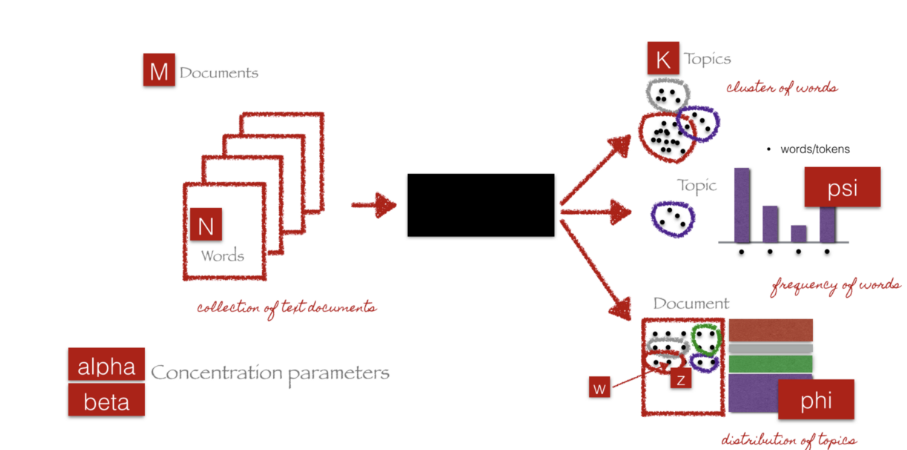

  - psi: the distribution of words for each topic K
  - phi: the distribution of topics for each document i

# Exercise

- corpora.dictionary: it implements the concept of a Dictionary – a mapping between words and their integer ids.

In [ ]:
from gensim.corpora import Dictionary

texts = [['human', 'interface', 'computer', 'play']]
dct = Dictionary(texts)  # initialize a Dictionary

In [ ]:
dct.token2id    # token -> token_id

{'computer': 0, 'human': 1, 'interface': 2, 'play': 3}

In [ ]:
dct.add_documents([["cat", "say", "meow"], ["dog", "say", "walwal"], ['rabbit']])  # add more document (extend the vocabulary)
dct.token2id

{'computer': 0,
 'human': 1,
 'interface': 2,
 'play': 3,
 'cat': 4,
 'meow': 5,
 'say': 6,
 'dog': 7,
 'walwal': 8,
 'rabbit': 9}

In [ ]:
len(dct)

10

In [ ]:
dct.doc2bow(["dog", "play", "computer", "any_non_existent_word"]) # convert document into BoW format(id, counts)

[(0, 1), (3, 1), (7, 1)]

- some python gramma exercises

In [ ]:
try:
    for i in range(10,-1,-1):
        print (10 // i)
except ZeroDivisionError:
    print("divide-by-zero error.")
finally:
    print("Done...")

1
1
1
1
1
2
2
3
5
10
divide-by-zero error.
Done...


In [ ]:
list(range(10,-1,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [ ]:
a ,b = 3, 5
c = ("{:<5}" * 4).format(*range(5))
c

'    0    1    2    3'

In [ ]:
a = [1,2,3]
print(a)
print(*a)

[1, 2, 3]
1 2 3
